In [1]:
import warnings
warnings.filterwarnings('ignore')

# Most important topic: power_transform

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import PowerTransformer

In [4]:
df= pd.read_csv('/kaggle/input/concrete/concrete_data.csv')

In [5]:
df

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


In [6]:
df.isnull().sum()

Cement                0
Blast Furnace Slag    0
Fly Ash               0
Water                 0
Superplasticizer      0
Coarse Aggregate      0
Fine Aggregate        0
Age                   0
Strength              0
dtype: int64

In [7]:
df.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [8]:
X= df.drop(columns= ['Strength'])
y= df.iloc[:, -1]

In [9]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.2, random_state= 42)

In [10]:
X_train.shape

(824, 8)

In [11]:
#applying regression without transformation
lr= LinearRegression()

lr.fit(X_train, y_train)

y_pred= lr.predict(X_test)
r2_score(y_test, y_pred)

0.6275531792314851

In [12]:
lr= LinearRegression()
np.mean(cross_val_score(lr, X, y, scoring= 'r2'))

0.46099404916628617

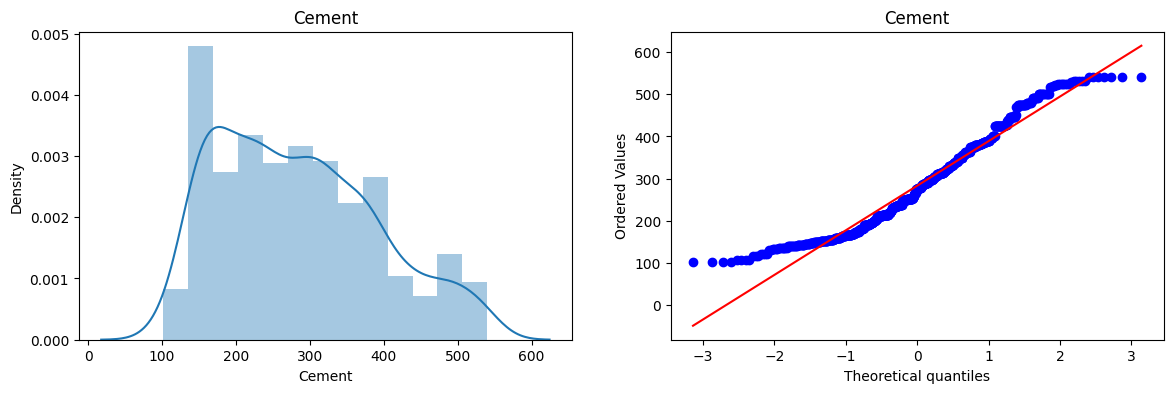

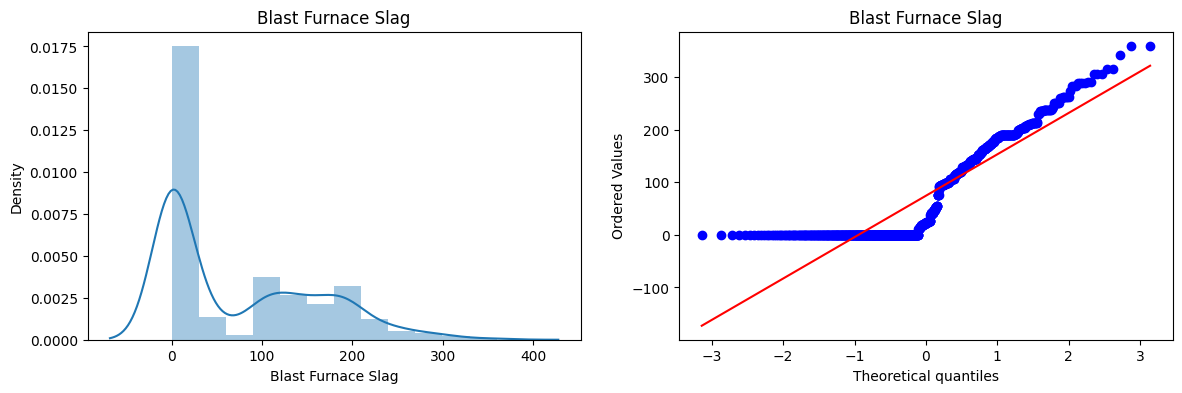

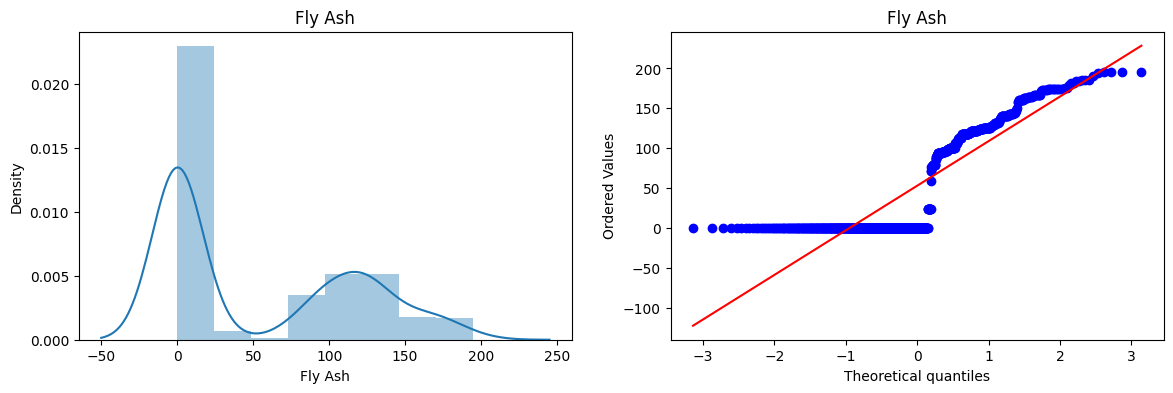

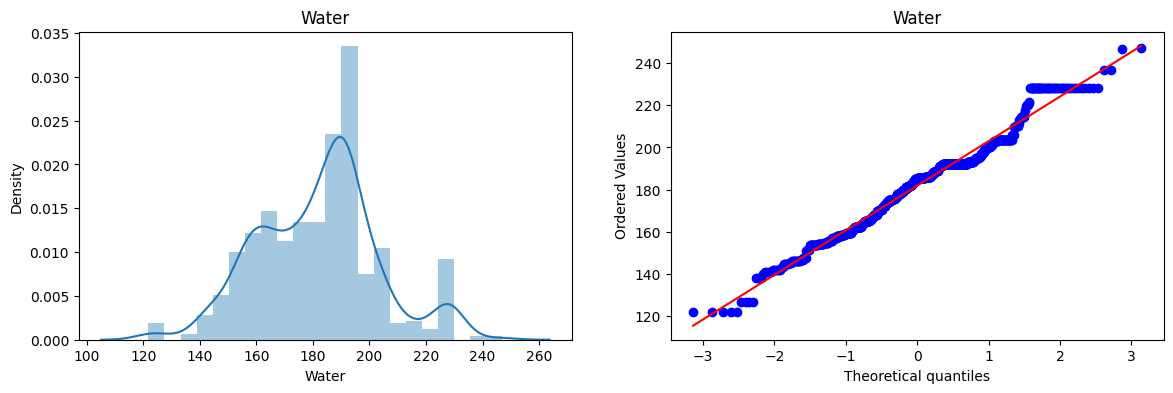

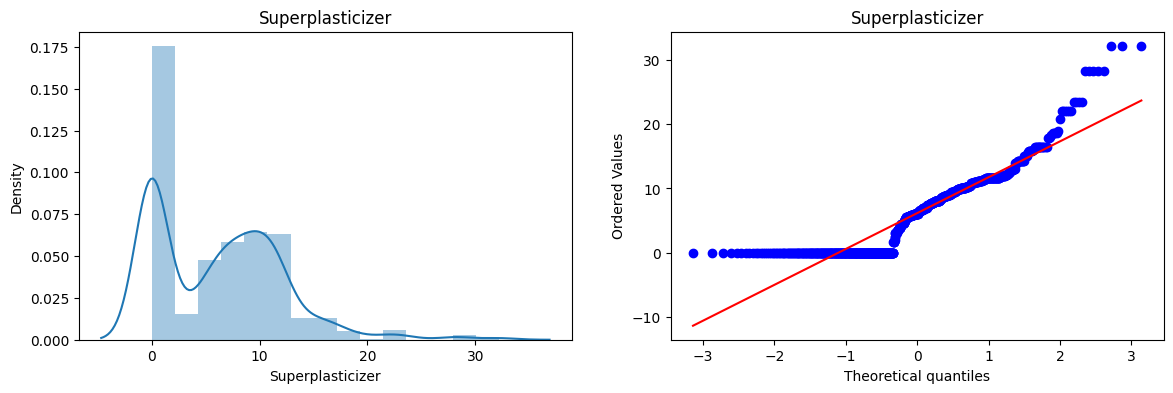

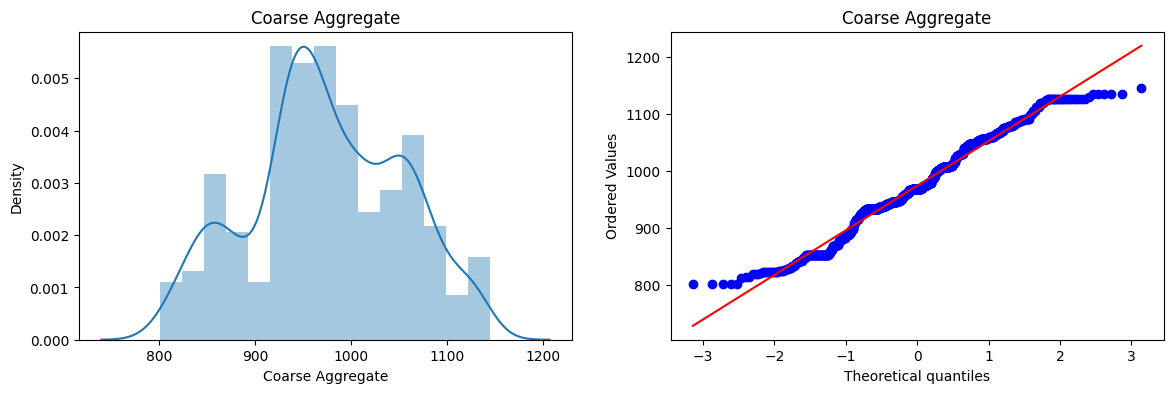

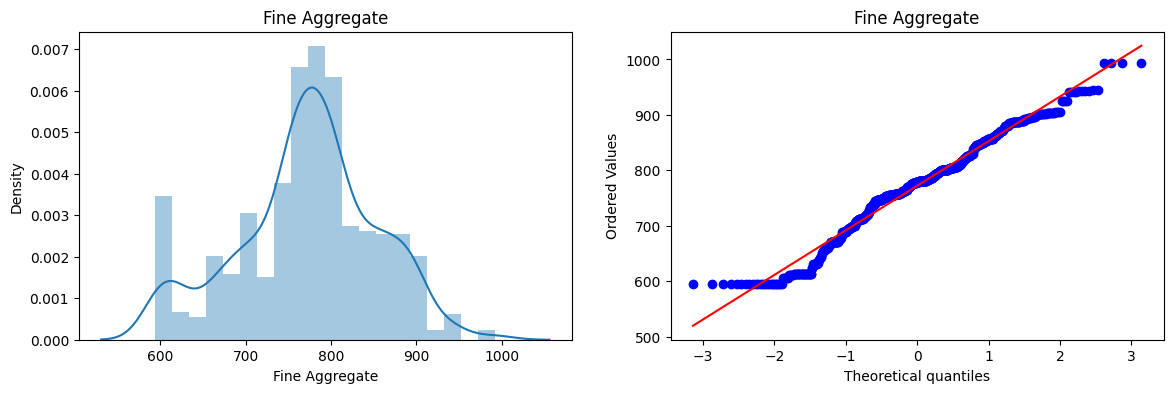

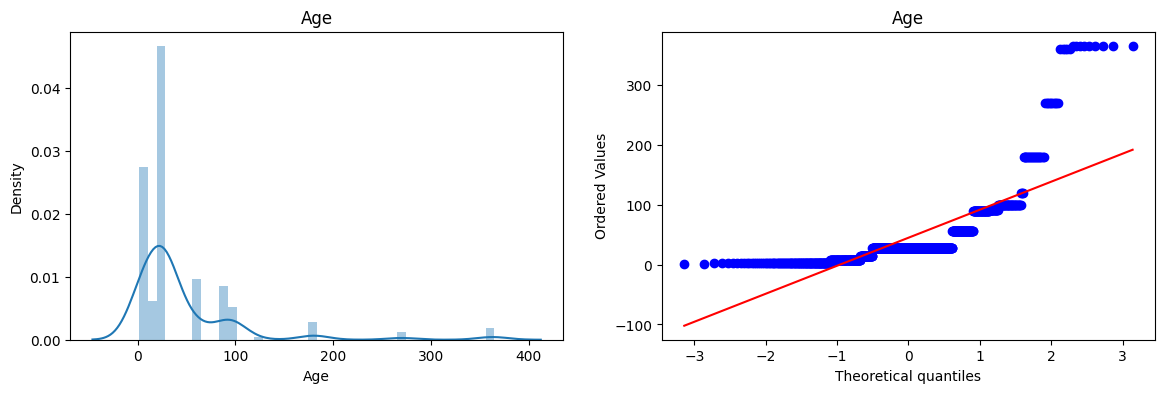

In [13]:
#plotting the distplots without any transformation

for col in X_train.columns:
    
    plt.figure(figsize= (14, 4))
    plt.subplot(121)
    sns.distplot(X_train[col])
    plt.title(col)

    plt.subplot(122)
    stats.probplot(X_train[col], dist= 'norm', plot= plt)
    plt.title(col)

    plt.show()


In [14]:
PT= PowerTransformer(method= 'box-cox')

X_train_transform= PT.fit_transform(X_train+0.000001)
X_test_transform= PT.transform(X_test+0.000001)

pd.DataFrame({
    'col':X_train.columns,
    'box_cox_col': PT.lambdas_
})


,col,box_cox_col
0,Cement,0.177025
1,Blast Furnace Slag,0.025093
2,Fly Ash,-0.038970
3,Water,0.772682
4,Superplasticizer,0.098811
5,Coarse Aggregate,1.129813
6,Fine Aggregate,1.782018
7,Age,0.066631


In [15]:
lr= LinearRegression()

lr.fit(X_train_transform, y_train)

y_pred2 = lr.predict(X_test_transform)

r2_score(y_test, y_pred2)


0.8047825005588295

In [16]:
PT = PowerTransformer(method= 'box-cox')
X_transform= PT.fit_transform(X+0.000001)

lr= LinearRegression()

np.mean(cross_val_score(lr,X_transform,y,scoring='r2'))

0.6662950329366337

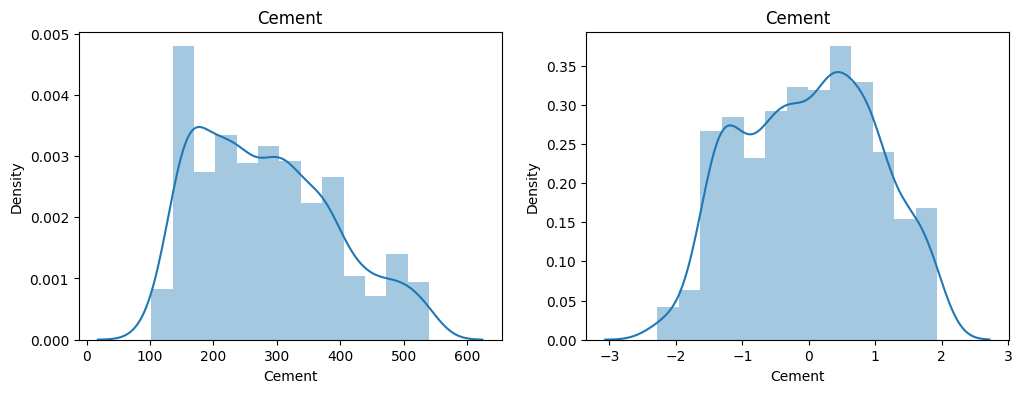

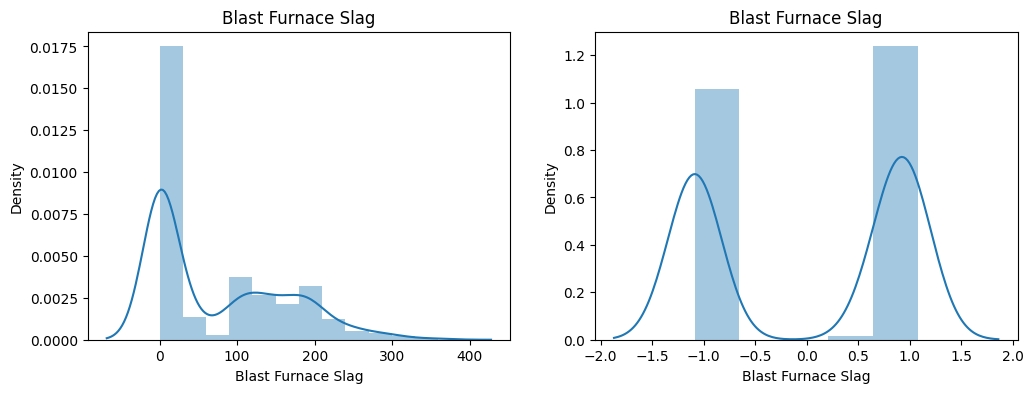

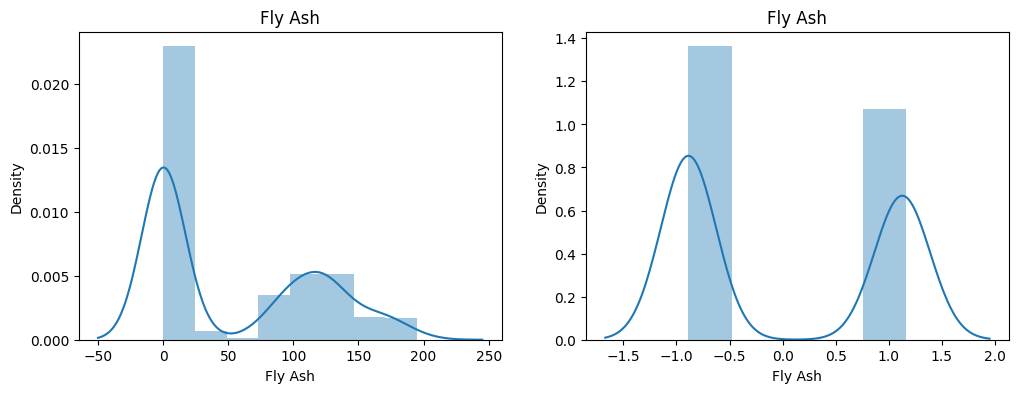

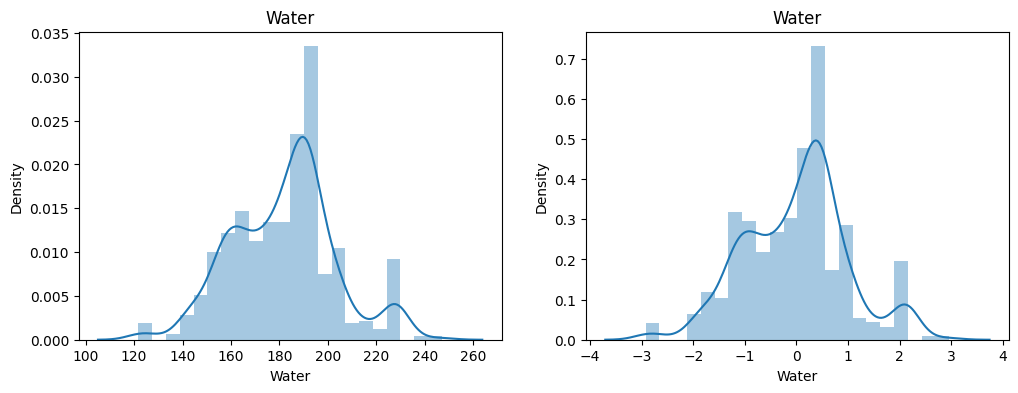

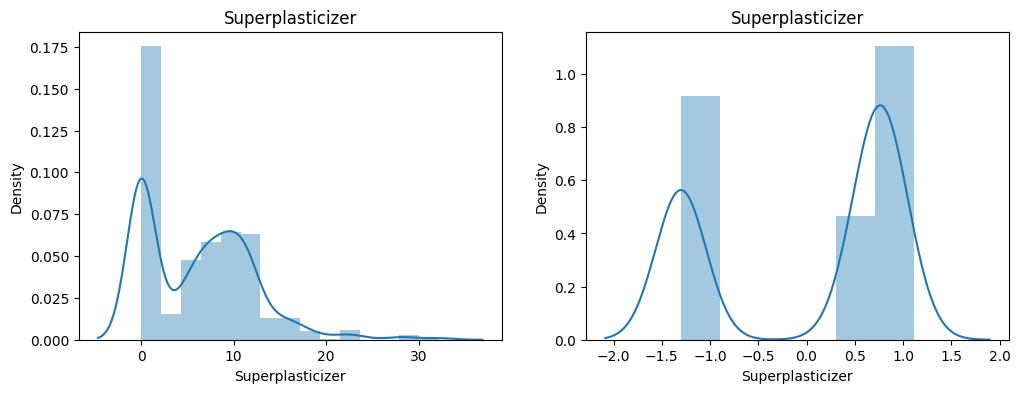

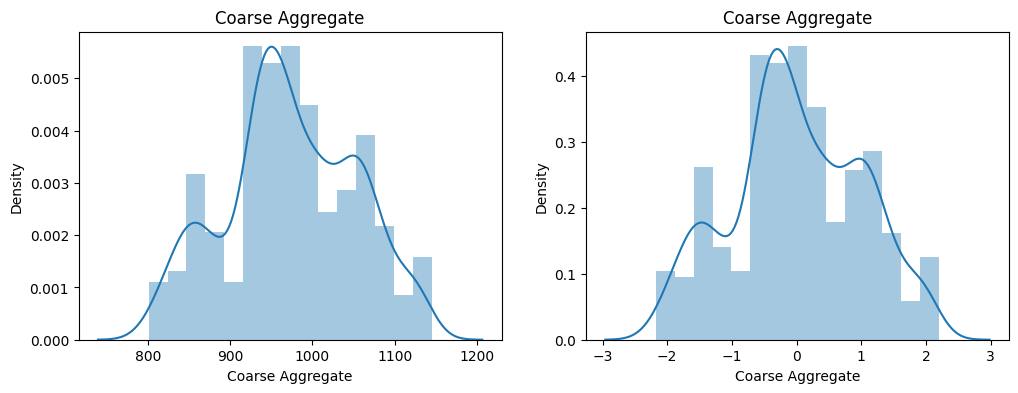

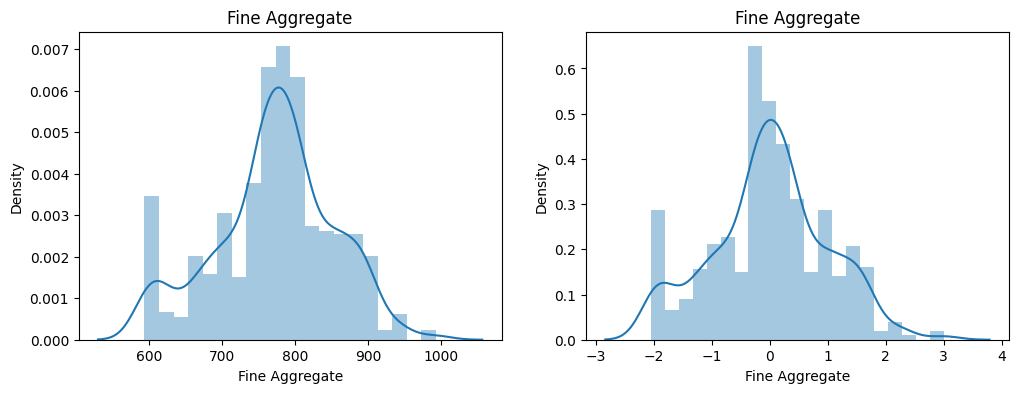

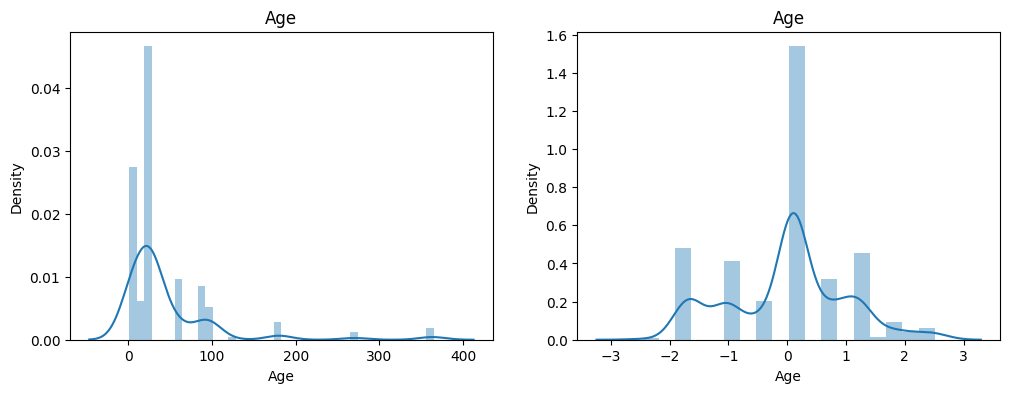

In [17]:
X_train_transform= pd.DataFrame(X_train_transform, columns= X_train.columns)

for col in X_train_transform.columns:
    plt.figure(figsize= (12, 4))
    plt.subplot(121)
    sns.distplot(X_train[col])
    plt.title(col)

    plt.subplot(122)
    sns.distplot(X_train_transform[col])
    plt.title(col)
    plt.show()

# # Apply Yeo-Johnson transform

In [18]:
PT1= PowerTransformer()

X_train_transform2 = PT1.fit_transform(X_train)
X_test_transform2= PT1.transform(X_test)

lr = LinearRegression()
lr.fit(X_train_transform2, y_train)

y_pred2= lr.predict(X_test_transform2)

print(r2_score(y_test, y_pred2))

pd.DataFrame({
    'col': X_train.columns,
    'yeo_johnson_lambdas': PT1.lambdas_
})

0.816190650848122


,col,yeo_johnson_lambdas
0,Cement,0.174348
1,Blast Furnace Slag,0.015715
2,Fly Ash,-0.161447
3,Water,0.771307
4,Superplasticizer,0.253935
5,Coarse Aggregate,1.130050
6,Fine Aggregate,1.783100
7,Age,0.019885


In [19]:
pt = PowerTransformer()
X_transform2= pt.fit_transform(X)

lr = LinearRegression()

np.mean(cross_val_score(lr,X_transform2, y, scoring= 'r2'))

0.6834625144470905

In [20]:
X_train_transform2= pd.DataFrame(X_train_transform2, columns= X_train.columns)

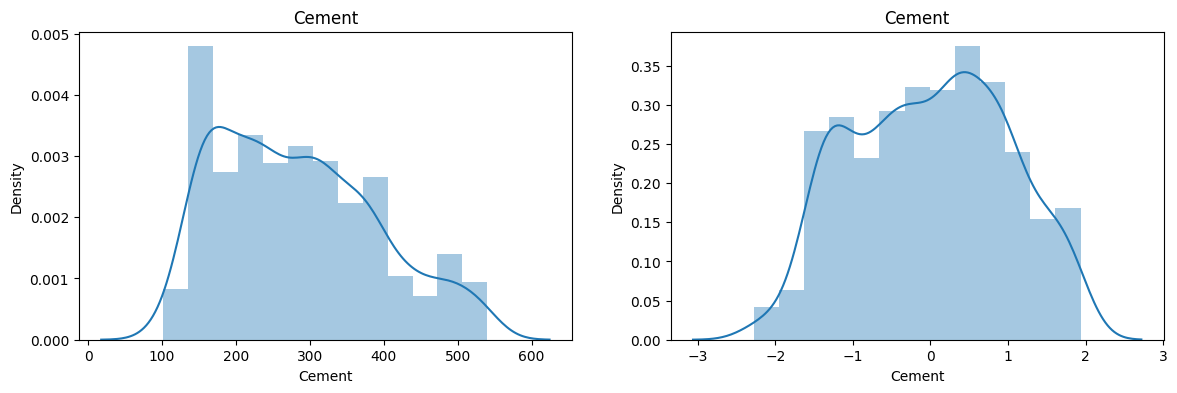

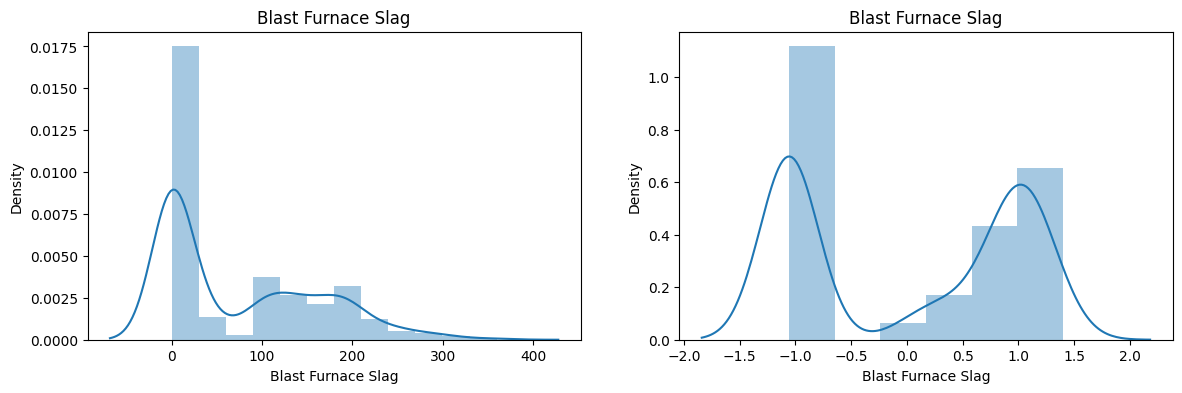

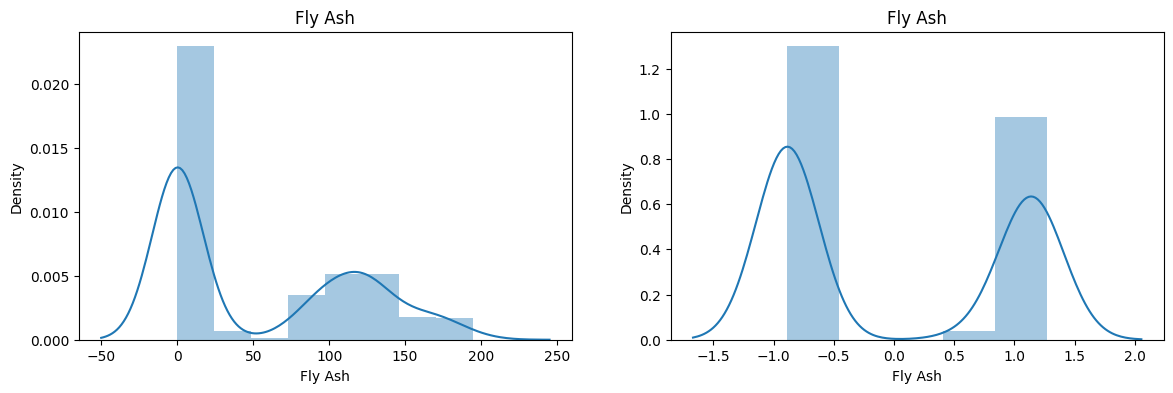

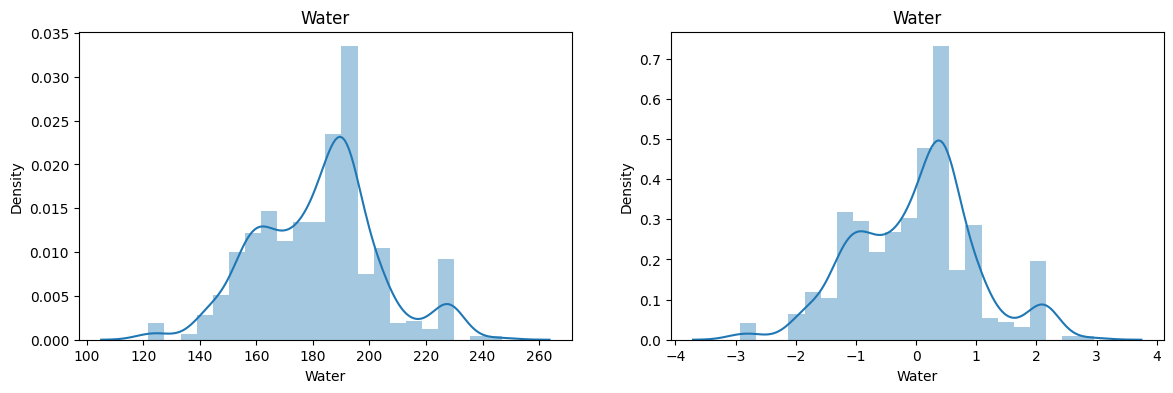

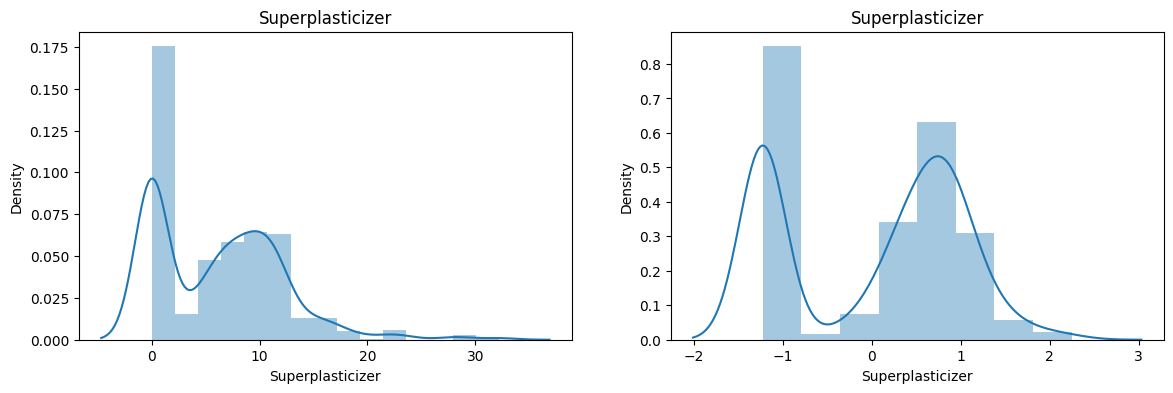

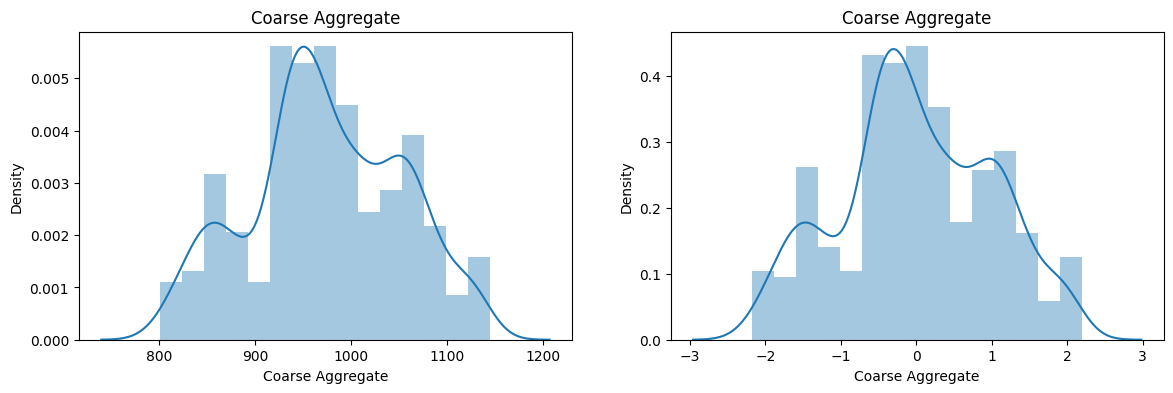

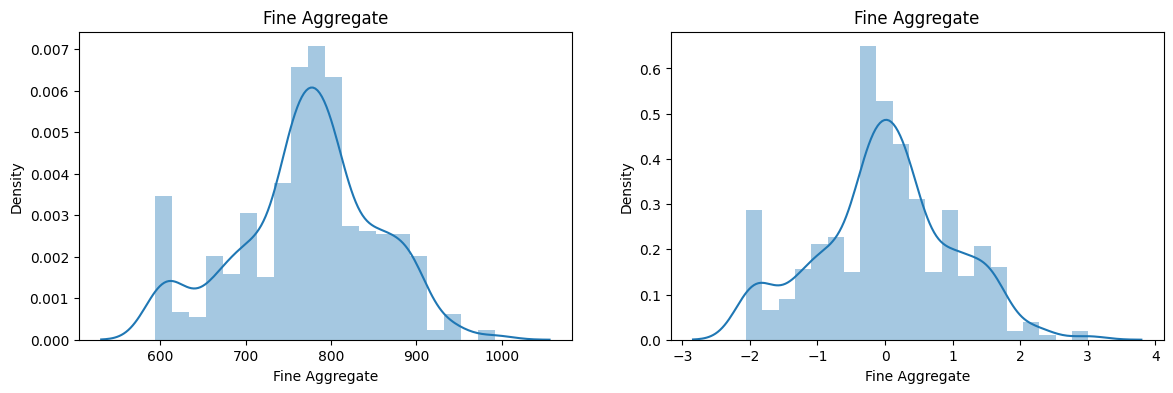

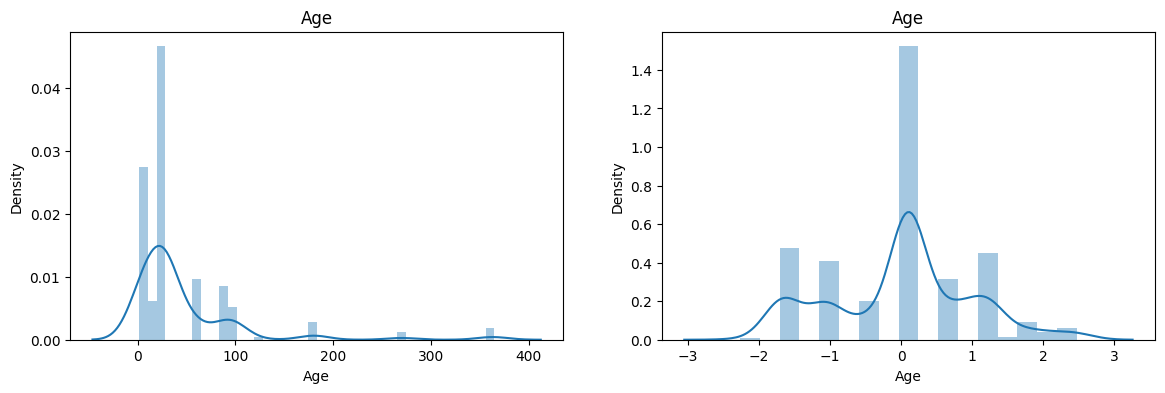

In [21]:
# Before and after comparison for Yeo-Johnson
for col in X_train_transform2.columns:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.distplot(X_train[col])
    plt.title(col)

    plt.subplot(122)
    sns.distplot(X_train_transform2[col])
    plt.title(col)

    plt.show()


In [22]:
pd.DataFrame({'cols':X_train.columns,'box_cox_lambdas':pt.lambdas_,'Yeo_Johnson_lambdas':PT1.lambdas_})

,cols,box_cox_lambdas,Yeo_Johnson_lambdas
0,Cement,0.169544,0.174348
1,Blast Furnace Slag,0.016633,0.015715
2,Fly Ash,-0.136480,-0.161447
3,Water,0.808438,0.771307
4,Superplasticizer,0.264160,0.253935
5,Coarse Aggregate,1.129395,1.130050
6,Fine Aggregate,1.830764,1.783100
7,Age,0.001771,0.019885
